# Romantic Relationship Data Analysis (Facebook) 
#### Author: Md. Abrar Jahin
As a Data Science enthusiast, I have always been thinking about an interesting project which will analyze my personal life. I've been in a serious long-term commitment since the last of July 2020. So, I've recently thought about collecting the desired dataset from 'Facebook Request Information Centre', exploring and cleaning data, and then analyze whatever I can derive from the data. Now let's get started.

## Importing Libraries 
At first we will import the necessary Python libraries. If the following libraries are not existing, then we need to install using `!pip install (library package name)`.
For example: `!pip install chart_studio`, in case you don't have chart-studio install on your machine.


In [27]:
import json
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from datetime import date
import chart_studio

## Plotly Credentials
Now sign up for a new account on Chart-studio using a valid username and then they will provide you with a new unique API Key upon verification by email. Now using the following code, insert your own unique username and API Key to work with interactive Plotly features and tools.
Go to the following link to create new account or sign-in to your Chart-studio account: 
https://chart-studio.plotly.com/settings/api

In [28]:
chart_studio.tools.set_credentials_file(username='Abrar2652', api_key='zx96rn2U8KEEVoNqZ8n8')

## Data Cleaning
Upon request from 'Facebook Request Information Section', the authority prepared the data items for me that I chose to download. Within the next 48 hours, they sent me the email regarding the completion of data preparation. The lead time depends upon the size of data you request. In the 'Download Your Information' section, I downloaded the `messages` in zip format they prepared from me. I only requested for the messages from `July 2020 to February 2021` because my conversation started with my life-partner on July 2020. 

There will be all the conversations in the zip file mentioning the names of the people you conversed with. The zip file is quite large (3.05 GB), so make sure you don't request for unnecessary data from Facebook to avoid killing your valuable time. There will also be all the audio, video, photo files you exchanged with all people. So just extract the necessary *JSON message files*.

You may face difficulties merging all the JSON files into one. I suggest you to do it manually using the following steps:
1. Keep the first JSON file intact, don't change it.
2. Copy the messages from other files and paste it in the desired place of the first file. If you know the Python Dictionary format, then it's easier for you to paste the messages in correct manner.
3. Then delete all the messages containing no text. I mean you should remove the links you shared. Just open notepad. find 'youtube' and remove that certain message. 
4. The efficient way to clean the data is to run the following code and you'll see error at a certain line. In the notepad, find and go to that line. Just delete that message showing error because usually error encounters when the message contains link or NULL

In [29]:
#Path to the JSON files
filepath = "G:\exp\message_1.json"

from copy import deepcopy



def cross_join(left, right):
    new_rows = []
    for left_row in left:
        for right_row in right:
            temp_row = deepcopy(left_row)
            for key, value in right_row.items():
                temp_row[key] = value
            new_rows.append(deepcopy(temp_row))
    return new_rows


def flatten_list(data):
    for elem in data:
        if isinstance(elem, list):
            yield from flatten_list(elem)
        else:
            yield elem


def json_to_dataframe(data_in):
    def flatten_json(data, prev_heading=''):
        if isinstance(data, dict):
            rows = [{}]
            for key, value in data.items():
                rows = cross_join(rows, flatten_json(value, prev_heading + '.' + key))
        elif isinstance(data, list):
            rows = []
            for i in range(len(data)):
                [rows.append(elem) for elem in flatten_list(flatten_json(data[i], prev_heading))]
        else:
            rows = [{prev_heading[1:]: data}]
        return rows

    return pd.DataFrame(flatten_json(data_in))


if __name__ == '__main__':
    with open(filepath) as json_file:
        json_data = json.load(json_file)
    
    df = json_to_dataframe(json_data)
df=df
df.tail()

,messages.sender_name,messages.timestamp_ms,messages.content,messages.reactions.reaction,messages.reactions.actor,messages.photos.uri,messages.photos.creation_timestamp,messages.audio_files.uri,messages.audio_files.creation_timestamp,messages.videos.uri,messages.videos.creation_timestamp,messages.videos.thumbnail.uri,messages.call_duration,messages.type,messages.is_unsent,messages.share.link,messages.gifs.uri,messages.files.uri,messages.files.creation_timestamp,messages.sticker.uri
96670,Abrar Jahin,1596138577998,I think I'm talking much,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96671,Abrar Jahin,1596138547696,Everyone doesn't have that taste to love music...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96672,Abrar Jahin,1596138509933,No no. It's your misconception.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96673,Hur E Zannat Mithi,1596138463713,Walaikumsalam...\nUnfortunately i don't have t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96674,Abrar Jahin,1596138370291,So Mithi Assalamualaikum. Do you sing?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Convert the timestamp provided in millisecond to the human recognizable date and time format

In [30]:
df['date_time']=pd.to_datetime(df['messages.timestamp_ms'], unit='ms')

Delete the unnecessary columns for our analysis

In [31]:
df=df.drop(['messages.timestamp_ms','messages.reactions.reaction','messages.photos.creation_timestamp','messages.audio_files.uri','messages.audio_files.creation_timestamp','messages.videos.creation_timestamp','messages.type','messages.files.creation_timestamp'],axis=1)
df.date_time

0       2021-02-12 20:20:41.419
1       2021-02-12 20:20:30.946
2       2021-02-12 20:20:11.929
3       2021-02-12 20:19:59.558
4       2021-02-12 20:19:58.222
                  ...          
96670   2020-07-30 19:49:37.998
96671   2020-07-30 19:49:07.696
96672   2020-07-30 19:48:29.933
96673   2020-07-30 19:47:43.713
96674   2020-07-30 19:46:10.291
Name: date_time, Length: 96675, dtype: datetime64[ns]

Let's count the total messages per day. Don't get panicked since we all have got different messaging styles. I prefer short messages and line-by-line texts but she prefers to text all her feelings into one single message. So no matter how many words creates a message, it'll be counted as a single message :)

In [32]:
df_timeline = df.groupby([df['date_time'].dt.date, 'messages.sender_name'])['messages.content'].count().reset_index()
df_timeline

,date_time,messages.sender_name,messages.content
0,2020-07-30,Abrar Jahin,60
1,2020-07-30,Hur E Zannat Mithi,35
2,2020-07-31,Abrar Jahin,26
3,2020-07-31,Hur E Zannat Mithi,15
4,2020-08-01,Abrar Jahin,98
...,...,...,...
388,2021-02-10,Hur E Zannat Mithi,252
389,2021-02-11,Abrar Jahin,668
390,2021-02-11,Hur E Zannat Mithi,373
391,2021-02-12,Abrar Jahin,1070



We exchanged *481.40* messages per day on average. Just sum up all the message contents and divide it by the number of rows.

In [33]:
df_timeline['messages.content'].sum()/(393/2)

481.40458015267177

In [34]:
df['messages.sender_name']

0               Abrar Jahin
1               Abrar Jahin
2               Abrar Jahin
3               Abrar Jahin
4        Hur E Zannat Mithi
                ...        
96670           Abrar Jahin
96671           Abrar Jahin
96672           Abrar Jahin
96673    Hur E Zannat Mithi
96674           Abrar Jahin
Name: messages.sender_name, Length: 96675, dtype: object

### Overall count of messages:

In [35]:
abrar_tot = df[df['messages.sender_name'] == 'Abrar Jahin'].count()
mithi_tot = df[df['messages.sender_name'] == 'Hur E Zannat Mithi'].count()

In [36]:
abrar_tot

messages.sender_name             64013
messages.content                 62393
messages.reactions.actor          3454
messages.photos.uri                852
messages.videos.uri                 87
messages.videos.thumbnail.uri       87
messages.call_duration             142
messages.is_unsent                 261
messages.share.link                107
messages.gifs.uri                   75
messages.files.uri                   4
messages.sticker.uri                 7
date_time                        64013
dtype: int64

Let's count the average number of messages sent by me and her individually.

In [37]:
df[df['messages.sender_name'] == 'Abrar Jahin']['messages.content'].count()/(393/2)

317.52162849872775

In [38]:
mithi_tot

messages.sender_name             32662
messages.content                 32203
messages.reactions.actor          9571
messages.photos.uri                437
messages.videos.uri                  7
messages.videos.thumbnail.uri        7
messages.call_duration              99
messages.is_unsent                 115
messages.share.link                 11
messages.gifs.uri                   10
messages.files.uri                   0
messages.sticker.uri                 0
date_time                        32662
dtype: int64

In [39]:
df[df['messages.sender_name'] == 'Hur E Zannat Mithi']['messages.content'].count()/(393/2)

163.88295165394402

### Standard Deviation of individual texting 

In [40]:
abrar_std = np.std(df_timeline[df_timeline['messages.sender_name']=='Abrar Jahin']['messages.content'])
mithi_std = np.std(df_timeline[df_timeline['messages.sender_name']=='Hur E Zannat Mithi']['messages.content'])
print(abrar_std)
print(mithi_std)

205.82403505713168
105.76329076020733


## Timeline of message sending by both:

In [41]:
## timeline of message sending by both
traceA = go.Scatter(
        x = list(df_timeline[df_timeline['messages.sender_name']=='Abrar Jahin'].date_time),
        y = list(df_timeline[df_timeline['messages.sender_name']=='Abrar Jahin']['messages.content']),
        mode = 'lines',
        name = 'by Abrar',
        marker = dict(
                color = 'rgb(221,46,107)'
                )
        )
traceM = go.Scatter(
        x = list(df_timeline[df_timeline['messages.sender_name']=='Hur E Zannat Mithi'].date_time),
        y = list(df_timeline[df_timeline['messages.sender_name']=='Hur E Zannat Mithi']['messages.content']),
        mode = 'lines',
        name = 'by Mithi',
        marker = dict(
                color = 'rgb(0,102,153)'
                )
        )
data = [traceM, traceA]
# slider set up:
layout = dict(
    title='All Messages Ever Sent, Timeline',
    legend = dict(orientation="h"),
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

In [42]:
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='analysis2-messaging-trends')

### Adding weekday column:

In [43]:
df['weekday'] = df['date_time'].apply(lambda x: x.weekday()) # list of the days of the week
def label_daysofweek (row):
    if row['weekday'] == 0 :
        return 'Monday'
    if row['weekday'] == 1 :
        return 'Tuesday'
    if row['weekday'] == 2 :
        return 'Wednesday'
    if row['weekday'] == 3 :
        return 'Thursday'
    if row['weekday'] == 4 :
        return 'Friday'
    if row['weekday'] == 5 :
        return 'Saturday'
    if row['weekday'] == 6 :
        return 'Sunday'
    return

## Weekday averages from each sender:

In [44]:
df_weekly = df.groupby(['messages.sender_name',df['date_time'].dt.day,'weekday'])['messages.content'].count().reset_index()
df_weekly['weekday_w'] = df_weekly.apply(lambda row: label_daysofweek (row),axis=1)
df_weekly_avg = df_weekly.groupby(['weekday','messages.sender_name'])['messages.content'].mean().reset_index()

df_weekly = df_weekly.sort_values(by='weekday')
df_weekly = df_weekly[df_weekly['messages.content']<700]
# plotting:
x = df_weekly[df_weekly['messages.sender_name']=='Abrar Jahin'].weekday_w.tolist()
y_abrar= df_weekly[df_weekly['messages.sender_name']=='Abrar Jahin']['messages.content'].tolist()
y_mithi= df_weekly[df_weekly['messages.sender_name']=='Hur E Zannat Mithi']['messages.content'].tolist()

trace_abrar = go.Box(
    y=y_abrar,
    x=df_weekly[df_weekly['messages.sender_name']=='Abrar Jahin'].weekday_w.tolist(),
    name='by Abrar',
    marker = dict(
            color = 'rgb(221,46,107)',
            outliercolor = 'rgba(224, 35, 79, 0.6)',
            line = dict(
                outliercolor = 'rgba(224, 35, 79, 0.6)',
                outlierwidth = 2)),
)
    
trace_mithi = go.Box(
    y=y_mithi,
    x=df_weekly[df_weekly['messages.sender_name']=='Hur E Zannat Mithi'].weekday_w.tolist(),
    name='by Mithi',
    marker=dict(
        color = 'rgb(0,102,153)',
        outliercolor = 'rgba(0, 73, 153, 0.6)',
        line = dict(
                outliercolor = 'rgba(0, 73, 153, 0.6)',
                outlierwidth = 2)
        )
)
    
layout = go.Layout(
    title='Weekly Messages Breakdown',
    yaxis=dict(
        zeroline=False,
        title='Distinct Messages Sent'
    ),
    boxmode='group'
)

data = [trace_mithi, trace_abrar]    
fig2 = go.Figure(data=data, layout=layout)
py.iplot(fig2,filename='analysis2-weekday-msgs')

In [45]:
df_weekly

,messages.sender_name,date_time,weekday,messages.content,weekday_w
0,Abrar Jahin,1,0,612,Monday
298,Hur E Zannat Mithi,25,0,250,Monday
101,Abrar Jahin,19,0,122,Monday
203,Hur E Zannat Mithi,7,0,230,Monday
96,Abrar Jahin,18,0,369,Monday
...,...,...,...,...,...
172,Hur E Zannat Mithi,1,6,18,Sunday
161,Abrar Jahin,30,6,157,Sunday
155,Abrar Jahin,29,6,10,Sunday
135,Abrar Jahin,25,6,298,Sunday


## Time of day analysis:
Let's group the texts on the basis of each hour. We can see that we both are super active at the 18th hour of the day and the lowest active at the 0th hour. 

In [46]:
tot_days = max(df.date_time.dt.date)-min(df.date_time.dt.date)
df_time_day = df.groupby([df['date_time'].dt.hour,'messages.sender_name'])['messages.content'].count().reset_index()
df_time_day['avg_mgs_hr'] = df_time_day['messages.content']/(393/2)
df_time_day

,date_time,messages.sender_name,messages.content,avg_mgs_hr
0,0,Hur E Zannat Mithi,6,0.030534
1,1,Abrar Jahin,79,0.402036
2,1,Hur E Zannat Mithi,11,0.055980
3,2,Abrar Jahin,128,0.651399
4,2,Hur E Zannat Mithi,15,0.076336
5,3,Abrar Jahin,69,0.351145
6,3,Hur E Zannat Mithi,7,0.035623
7,4,Abrar Jahin,442,2.249364
8,4,Hur E Zannat Mithi,253,1.287532
9,5,Abrar Jahin,924,4.702290


In [47]:
df_time_day['avg_mgs_hr'].min()

0.030534351145038167

In [48]:
df_time_day['avg_mgs_hr'].max()

71.93893129770993

## Plot the histogram based on the total counts on it
### plot the daily average

In [49]:
gt_daytime = np.array(df_time_day[df_time_day['messages.sender_name']=='Abrar Jahin'].avg_mgs_hr)
oj_daytime = np.array(df_time_day[df_time_day['messages.sender_name']=='Hur E Zannat Mithi'].avg_mgs_hr)
diff = oj_daytime-gt_daytime

trace1 = go.Bar(
    x=df_time_day[df_time_day['messages.sender_name']=='Abrar Jahin'].date_time,
    y=df_time_day[df_time_day['messages.sender_name']=='Abrar Jahin'].avg_mgs_hr,
    name='by Abrar',
    marker=dict(
        color = 'rgb(221,46,107)'
        )
)
trace2 = go.Bar(
    x=df_time_day[df_time_day['messages.sender_name']=='Hur E Zannat Mithi'].date_time,
    y=df_time_day[df_time_day['messages.sender_name']=='Hur E Zannat Mithi'].avg_mgs_hr,
    name='by Mithi',
    marker=dict(
        color='rgb(0,102,153)',
        )
)
trace3 = go.Bar(
    x=df_time_day[df_time_day['messages.sender_name']=='Hur E Zannat Mithi'].date_time,
    y=diff,
    name='difference',
    marker=dict(
        color='rgb(244,130,24)',
        )
)

data = [trace1, trace2,trace3]
layout = go.Layout(
    title='Average Hourly Messages',
    xaxis = dict(title='Time of Day'),
    yaxis = dict(title='Average No. of Messages'),
    legend = dict(orientation="h"),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='analysis2-avg-per-hour')

## Looking at the differences in time

#### Who's the initiator?
#### Find the first messages of each day (after 7am)
#### Find the first messages of each conversation (gaps of 2 hours between last and first)

In [50]:
# removing anything before 7am:
df_7_am = df[df['date_time'].dt.hour > 6]

# finding the first messages of each day:
df_firsts = df_7_am.groupby(df['date_time'].dt.date).apply(lambda x: x.iloc[[0]])

# plotting:
# plot the count of first messages (separate curve pp), group by hour of day, show the timeline
df_firsts = df_firsts.rename(index=str, columns={"date_time": "time1"}).reset_index()
df_firsts['hour'] = df_firsts.time1.dt.hour
#df_firsts = df_firsts.groupby([df_firsts['time1'].dt.hour,'sender']).count()
#df_firsts = df_firsts.drop(columns=['date_time','time1']).reset_index()

trace1 = go.Histogram(
    x=df_firsts[df_firsts['messages.sender_name']=='Abrar Jahin'].hour,
    name='by Abrar',
    opacity=0.75,
    xbins=dict(
        start=7.0,
        end=24.0,
        size=1
    ),
    marker=dict(
        color='rgb(221,46,107)',
        )
)
trace2 = go.Histogram(
    x=df_firsts[df_firsts['messages.sender_name']=='Hur E Zannat Mithi'].hour,
    name='by Mithi',
    opacity=0.75,
    xbins=dict(
        start=7.0,
        end=24.0,
        size=1
    ),
    marker=dict(
        color='rgb(0,102,153)',
        )
)

data = [trace2, trace1]
layout = go.Layout(
        barmode='overlay',
        title='First Messages of the Day',
        xaxis = dict(title='Time of Day'),
        yaxis = dict(title = 'Distinct Messages'),
        legend = dict(orientation="h"),
    )
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='analysis2-first-msg-dist')


### Plotting number of initiations for each month (sum on num-msg, in group by month)

In [51]:

df_firsts.date_time = pd.to_datetime(df_firsts['date_time'])
df_timeline_init = df_firsts.groupby(['messages.sender_name', df_firsts.date_time.dt.year, df_firsts.time1.dt.month]).sum().reset_index()
from datetime import datetime
df_timeline_init['date'] = df_timeline_init.apply(lambda row: datetime(row['date_time'], row['time1'], 1), axis=1)
#df_timeline_init = df_timeline_init.reindex([3,4,5,6,7,8,9,10,0,1,2,14,15,16,17,18,19,20,21,11,12,13])

traceG1 = go.Scatter(
        x = list(df_timeline_init[df_timeline_init['messages.sender_name']=='Abrar Jahin'].date),
        y = list(df_timeline_init[df_timeline_init['messages.sender_name']=='Abrar Jahin'].hour),
        mode = 'lines',
        name = 'by Abrar',
        marker = dict(
                color = 'rgb(221,46,107)'
                )
        )

traceO1 = go.Scatter(
        x = list(df_timeline_init[df_timeline_init['messages.sender_name']=='Hur E Zannat Mithi'].date),
        y = list(df_timeline_init[df_timeline_init['messages.sender_name']=='Hur E Zannat Mithi'].hour),
        mode = 'lines',
        name = 'by Mithi',
        marker = dict(
                color = 'rgb(0,102,153)'
                )
        )

data = [traceO1, traceG1]
layout = go.Layout(
        title='Initiative Throughout Time',
        xaxis = dict(title = 'Month and Year'),
        yaxis = dict(title = 'Count of days of initiated conversation'),
        legend = dict(orientation="h"),
    )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='analysis2-initiative-trends')

In [52]:
df_firsts.date_time = pd.to_datetime(df_firsts['date_time'])
df_timeline_init = df_firsts.groupby(['messages.sender_name', df_firsts.date_time.dt.year, df_firsts.time1.dt.month]).sum().reset_index()
df_timeline_init

,messages.sender_name,date_time,time1,messages.call_duration,weekday,hour
0,Abrar Jahin,2020,7,0.0,3,20
1,Abrar Jahin,2020,8,0.0,80,510
2,Abrar Jahin,2020,9,0.0,72,510
3,Abrar Jahin,2020,10,8929.0,76,448
4,Abrar Jahin,2020,11,5664.0,75,474
5,Abrar Jahin,2020,12,1922.0,71,501
6,Abrar Jahin,2021,1,10234.0,67,449
7,Abrar Jahin,2021,2,0.0,27,219
8,Hur E Zannat Mithi,2020,7,0.0,4,17
9,Hur E Zannat Mithi,2020,8,11867.0,15,78


## Show the word cloud of the first words
We will clean the punctuations, irrelevant stopwords and dirty words from the texts. We will lower the strings and split each text into words. According to the word count, we'll create the wordcloud.

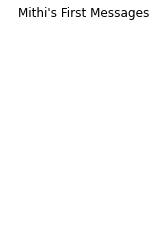

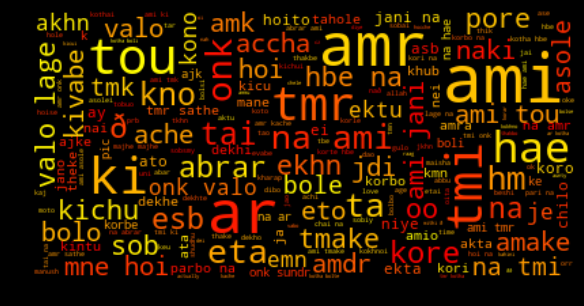

In [53]:
from nltk.tokenize import word_tokenize
# cleaning stop words from relevant df:
import string
# cleaning stop words from relevant df:
df_no_media = df[df['messages.content'].notnull()==True]

df_cloud= df_no_media.copy()
df_cloud['sender']=df_cloud['messages.sender_name']
df_cloud["content"] = df["messages.content"]
df_cloud["content"] = df_cloud["content"].str.lower().str.strip().str.replace('[^\w\s]', '').str.split()


# also removing dirty words:
dirt = ['cum','fucking','bottomed','fuck','sex','boobs']
stop = stopwords.words('english')
stop.extend(dirt)

df_cloud['content'] = df_cloud['content'].apply(lambda x:' '.join([item for item in x if item not in stop]))


ax1 = plt.subplot(121)
# creating word cloud for Mithi:
text_oli = df_cloud[df_cloud['sender']=='Hur E Zannat Mithi']['content']
wordcloud_oli = WordCloud(colormap='autumn', relative_scaling = 0.69, stopwords = stop, max_font_size=50).generate(' '.join(text_oli))
plt.axis("off")
ax1.set_title('Mithi\'s First Messages')
plt.figure( figsize=(10,5),facecolor='k')
plt.imshow(wordcloud_oli, interpolation='bilinear')
plt.show()

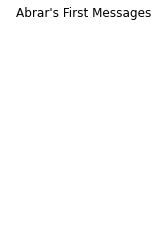

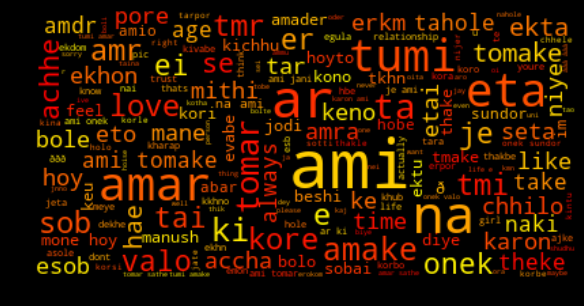

In [54]:
ax2 = plt.subplot(122)
# for Abrar:
text_guy = df_cloud[df_cloud['sender']=='Abrar Jahin']['content']
wordcloud_guy = WordCloud(colormap='autumn',relative_scaling = 0.69, stopwords = stop, max_font_size=50).generate(' '.join(text_guy))

plt.axis("off")
ax2.set_title('Abrar\'s First Messages')
plt.figure( figsize=(10,5),facecolor='k')
plt.imshow(wordcloud_guy, interpolation='bilinear')


plt.show()

### Time delay analysis 
We will compare the consecutive messages whether the sender is not equal to the previous sender or not. If the consecutive senders are different, we can append the rows into a new dataframe which will count the delay of each sender's reply.

In [ ]:
## time delay analysis
df_delay = pd.DataFrame(columns = df.columns)

# filling in a new df with only non-consecutive messages
for i in range(0, df.shape[0]-1):
    if df.iloc[i]['messages.sender_name'] != df.iloc[i+1]['messages.sender_name']:
        df_delay = df_delay.append(df.iloc[i])
    print(i)


We will keep the messages having time gaps between 0 to 180 minutes only.

In [56]:
df_delay = df.copy()
# extracting time differences between all messages:
df_delay['diff_dt'] = df_delay.date_time.diff()
df_delay.drop(df_delay.index[0], inplace = True)

df_delay['diff_m'] = df_delay['diff_dt'].dt.total_seconds().div(60).astype(int)
# keeping only gaps between 0 and 180 minutes
df_delay = df_delay[df_delay.diff_m < 180]
df_delay = df_delay[df_delay.diff_m >= 0]

# adding day of week:
df_delay['day'] = df_delay.apply (lambda row: label_daysofweek (row),axis=1)
df_delay

,messages.sender_name,messages.content,messages.reactions.actor,messages.photos.uri,messages.videos.uri,messages.videos.thumbnail.uri,messages.call_duration,messages.is_unsent,messages.share.link,messages.gifs.uri,messages.files.uri,messages.sticker.uri,date_time,weekday,diff_dt,diff_m,day
1,Abrar Jahin,Honey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-12 20:20:30.946,4,-1 days +23:59:49.527000,0,Friday
2,Abrar Jahin,I've kiss for you,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-12 20:20:11.929,4,-1 days +23:59:40.983000,0,Friday
3,Abrar Jahin,Amio dekhtam,Hur E Zannat Mithi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-12 20:19:59.558,4,-1 days +23:59:47.629000,0,Friday
4,Hur E Zannat Mithi,Asi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-12 20:19:58.222,4,-1 days +23:59:58.664000,0,Friday
5,Hur E Zannat Mithi,Kokhnoi jabo na,Abrar Jahin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-12 20:19:54.784,4,-1 days +23:59:56.562000,0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96669,Hur E Zannat Mithi,No no it's truth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30 19:49:49.151,3,-1 days +23:59:24.456000,0,Thursday
96670,Abrar Jahin,I think I'm talking much,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30 19:49:37.998,3,-1 days +23:59:48.847000,0,Thursday
96671,Abrar Jahin,Everyone doesn't have that taste to love music...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30 19:49:07.696,3,-1 days +23:59:29.698000,0,Thursday
96672,Abrar Jahin,No no. It's your misconception.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30 19:48:29.933,3,-1 days +23:59:22.237000,0,Thursday


We exchanged total 1289 photos and 94 videos till now

In [57]:
df['messages.photos.uri'].notnull().sum()

1289

In [58]:
df['messages.videos.uri'].notnull().sum()

94

Just keep the text messages which don't contain any media or NULL data.

In [59]:
df_no_media = df[df['messages.content'].notnull()==True]

In [60]:
### CONTENT

# who sends more media? 
df_media = df[df['messages.photos.uri'].notnull()==True]
df_media.append(df[df['messages.gifs.uri'].notnull()==True])
df_media.append(df[df['messages.videos.uri'].notnull()==True])

count_o = df_media[df_media['messages.sender_name'] == 'Hur E Zannat Mithi'].count() 
count_g = df_media[df_media['messages.sender_name']=='Abrar Jahin'].count() 

# content overall
df_no_media = df[df['messages.content'].notnull()==True]
df_texts = df_no_media.copy()
df_texts['word_count'] = df_texts['messages.content'].str.count(' ') + 1

word_count_g = df_texts[df_texts['messages.sender_name']=='Abrar Jahin'].word_count
tot_words_g = np.sum(word_count_g)
av_g = np.mean(word_count_g)
st_g = np.std(word_count_g)
word_count_o = df_texts[df_texts['messages.sender_name']=='Hur E Zannat Mithi'].word_count
tot_words_o = np.sum(word_count_o)
av_o = np.mean(word_count_o)
st_o = np.std(word_count_o)

df_texts['content'] = df_texts['messages.content'].str.lower()

# creating over all word clouds
stop = stopwords.words('english')

new_stops = ["i'll","yeah","I'll","yeah","yes","no","might","course",
             "I'm","could","I'm gonna","Oh","well","Maybe","don't","it",
             "you're","didn't","thank","you","cum","fuck","bottomed","boobs"]
stop.extend(new_stops)

# getting word lists for export:
df_texts['lowercase'] = df_texts["content"].str.strip().str.replace('[^\w\s]', '').str.split()

df_texts['cleaned'] = df_texts['lowercase'].apply(lambda x:' '.join([item for item in x if item not in stop]))

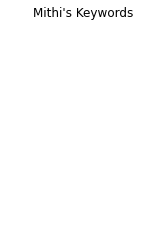

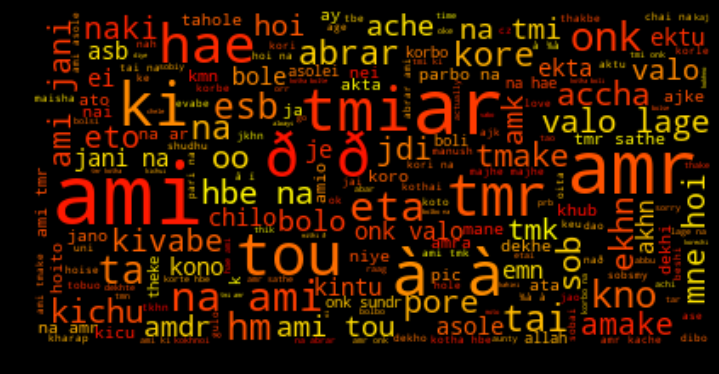

In [61]:
ax1 = plt.subplot(121)
# creating word cloud for Mithi:
text_oli = df_texts[df_texts['messages.sender_name']=='Hur E Zannat Mithi']['content']
wordcloud_oli = WordCloud(colormap='autumn',relative_scaling = 0.69, stopwords = stop, max_font_size=50).generate(' '.join(text_oli))
plt.axis("off")
ax1.set_title('Mithi\'s Keywords')

plt.figure( figsize=(10,5),facecolor='k')
plt.imshow(wordcloud_oli, interpolation='bilinear')

plt.tight_layout(pad=0)
plt.show()


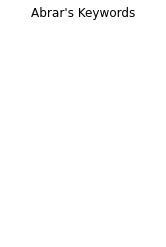

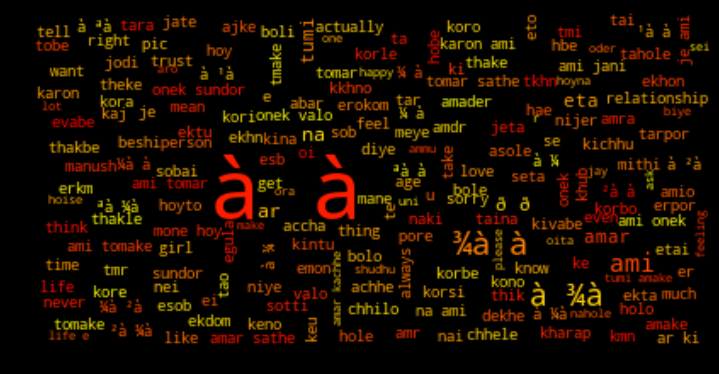

In [62]:
ax2 = plt.subplot(122)
# for Abrar:
text_guy = df_texts[df_texts['messages.sender_name']=='Abrar Jahin']['content']
wordcloud_guy = WordCloud(colormap='autumn',relative_scaling = 0.69, stopwords = stop, max_font_size=50).generate(' '.join(text_guy))

plt.axis("off")
ax2.set_title('Abrar\'s Keywords')

plt.figure( figsize=(10,5),facecolor='k')
plt.imshow(wordcloud_guy, interpolation='bilinear')

plt.tight_layout(pad=0)
plt.show()


## Sentiment Analysis of each sender's text messages

In [63]:
# Introducing sentiment analysis, using the Vader library:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()



new_words = {
    'merci': 1.0,
    'valobasi': 5.0,
    'ay': 2.0,
    'biye': 3.0,
    'omg': 1.0,
    ':)))': 5.0,
    "ain't": -1.5,
    'hahahah': 5.0,
    'hahaha': 5.0,
    'heyy': 2.0,
    ':))': 4.5,
    'donno': -1.5,
    'sowwy': -0.5,
    '!!': 2.0,
    'bar': -3.4,
    'tired': -4.5,
    'aishee':-5.0,
    'rag':-3.5,
    'jhogra':-4,
    'joghra':-4,
    'sick': -5.0,
    'dying': -4.0,
    ':*': 5.0,
    'ji': 3.5,
    'breakup': -4.5,
    'jabona': 5.0,
    'thakbo': 3.5,
    'go': 4.0,
    'bou': 3.0
}

analyser.lexicon.update(new_words)

    
def apply_sentiment(sentence):
    snt = analyser.polarity_scores(sentence)
    return snt['neu'],snt['pos'],snt['neg']

df_texts.content = df_texts.content.str.lower()

#pos1,neu1,neg1 = apply_sentiment(content_guy[1])
df_texts['sentiments'] = df_texts.content.apply(lambda sentence: apply_sentiment(sentence))
df_texts[['neutral','positive', 'negative']] = pd.DataFrame(df_texts['sentiments'].tolist(), index=df_texts.index)
df_texts['sentiment_final'] = df_texts[['positive','neutral','negative']].idxmax(axis=1)

# counting sentiments for each:
gt_counts = df_texts[df_texts['messages.sender_name']=='Abrar Jahin'].groupby('sentiment_final').count()

oj_counts = df_texts[df_texts['messages.sender_name']=='Hur E Zannat Mithi'].groupby('sentiment_final').count()

In [64]:
df_texts

,messages.sender_name,messages.content,messages.reactions.actor,messages.photos.uri,messages.videos.uri,messages.videos.thumbnail.uri,messages.call_duration,messages.is_unsent,messages.share.link,messages.gifs.uri,...,weekday,word_count,content,lowercase,cleaned,sentiments,neutral,positive,negative,sentiment_final
0,Abrar Jahin,Take care. I love you.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,5,take care. i love you.,"[take, care, i, love, you]",take care love,"(0.288, 0.712, 0.0)",0.288,0.712,0.000,positive
1,Abrar Jahin,Honey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,1,honey,[honey],honey,"(1.0, 0.0, 0.0)",1.000,0.000,0.000,neutral
2,Abrar Jahin,I've kiss for you,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,4,i've kiss for you,"[ive, kiss, for, you]",ive kiss,"(0.517, 0.483, 0.0)",0.517,0.483,0.000,neutral
3,Abrar Jahin,Amio dekhtam,Hur E Zannat Mithi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,amio dekhtam,"[amio, dekhtam]",amio dekhtam,"(1.0, 0.0, 0.0)",1.000,0.000,0.000,neutral
4,Hur E Zannat Mithi,Asi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,1,asi,[asi],asi,"(1.0, 0.0, 0.0)",1.000,0.000,0.000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96670,Abrar Jahin,I think I'm talking much,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,5,i think i'm talking much,"[i, think, im, talking, much]",think im talking much,"(1.0, 0.0, 0.0)",1.000,0.000,0.000,neutral
96671,Abrar Jahin,Everyone doesn't have that taste to love music...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,11,everyone doesn't have that taste to love music...,"[everyone, doesnt, have, that, taste, to, love...",everyone doesnt taste love music music taste m...,"(0.629, 0.371, 0.0)",0.629,0.371,0.000,neutral
96672,Abrar Jahin,No no. It's your misconception.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,5,no no. it's your misconception.,"[no, no, its, your, misconception]",misconception,"(0.645, 0.0, 0.355)",0.645,0.000,0.355,neutral
96673,Hur E Zannat Mithi,Walaikumsalam...\nUnfortunately i don't have t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,14,walaikumsalam...\nunfortunately i don't have t...,"[walaikumsalam, unfortunately, i, dont, have, ...",walaikumsalam unfortunately dont blessing tale...,"(0.394, 0.511, 0.095)",0.394,0.511,0.095,positive


## Pie chart for each sender's sentiment analysis

In [65]:
fig = {
    'data': [
        {
            'labels': ['Positive', 'Negative', 'Neutral'],
            'values': [gt_counts.iloc[2,0], gt_counts.iloc[0,0], gt_counts.iloc[1,0]],
            'type': 'pie',
            'name': 'Abrar Messages Sentiment',
            'marker': {'colors': ['rgb(62, 216, 134)',
                                  'rgb(252, 85, 113)',
                                  'rgb(167, 173, 178)']},
            'domain': {'x': [0, .49]},
            'hoverinfo':'label+value+name',
            'textinfo':'percent',
            'title': 'Messages by Abrar'
        },
        {
            'labels': ['Positive', 'Negative', 'Neutral'],
            'values': [oj_counts.iloc[2,0], oj_counts.iloc[0,0], oj_counts.iloc[1,0]],
            'type': 'pie',
            'name': 'Mithi Messages Sentiment',
            'marker': {'colors': ['rgb(62, 216, 134)',
                                  'rgb(252, 85, 113)',
                                  'rgb(167, 173, 178)']},
            'domain': {'x': [.50, 1]},
            'hoverinfo':'label+value+name',
            'textinfo':'percent',
            'title': 'Messages by Mithi'

        }
            ],
    'layout': {'title': 'Sentiment Analysis of All Messages',
               'showlegend': True}
}
            
py.iplot(fig, filename='analysis2-sentiment-piechart')

## Sentiment Analysis during daytime
We'll only keep the messages after 6AM

In [66]:
## daytime sentiment

df_sent_day = df_texts.groupby(['messages.sender_name','sentiment_final',df_texts.date_time.dt.hour,'content']).count()
df_sent_day = df_sent_day.drop(df_sent_day.columns[0], axis=1)
df_sent_day = df_sent_day.drop(df_sent_day.columns[1:], axis=1).reset_index()
df_sent_day = df_sent_day[df_sent_day['sentiment_final']!='neutral']
df_sent_day = df_sent_day[df_sent_day['date_time']>6]

df_sent_day_g = df_sent_day[df_sent_day['messages.sender_name']=='Abrar Jahin']
df_sent_day_o = df_sent_day[df_sent_day['messages.sender_name']=='Hur E Zannat Mithi']
snt_counts_gt = []
snt_counts_oj = []


df_sent_day_o

,messages.sender_name,sentiment_final,date_time,content,messages.reactions.actor
60739,Hur E Zannat Mithi,negative,7,accha esb bad dao,0
60740,Hur E Zannat Mithi,negative,7,ajob...tmi koro tension,0
60741,Hur E Zannat Mithi,negative,7,ami tmr birth year ask kortam..but bar bar vul...,0
60742,Hur E Zannat Mithi,negative,7,ara nah,0
60743,Hur E Zannat Mithi,negative,7,ara sorry bolar ki ache,0
...,...,...,...,...,...
89848,Hur E Zannat Mithi,positive,21,sure na,0
89849,Hur E Zannat Mithi,positive,21,tmakei biye korbo,0
89850,Hur E Zannat Mithi,positive,21,tmi ghumao plz,0
89851,Hur E Zannat Mithi,positive,21,tmr hand writing dekhlo,1


In [67]:
data = [
    go.Bar(
        x=df_sent_day_g[df_sent_day_g['sentiment_final']=='negative'].date_time, # assign x as the dataframe column 'x'
        y=df_sent_day_g[df_sent_day_g['sentiment_final']=='negative'].content,
        name='Negative',
        marker = dict(
                color = 'rgb(252, 85, 113)'
                )
    ),
    go.Bar(
        x=df_sent_day_g[df_sent_day_g['sentiment_final']=='positive'].date_time, # assign x as the dataframe column 'x'
        y=df_sent_day_g[df_sent_day_g['sentiment_final']=='positive'].content,
        name='Positive',
        marker = dict(
                color = 'rgb(62, 216, 134)'
                )
    )
]

layout = go.Layout(
    barmode='stack',
    title='Sentiment by Time of Day, Abrar',
    xaxis = dict(title='Time of Day'),
    yaxis = dict(title= 'No. of Messages')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='analysis2-daytime-sentiment_g')

In [68]:
df_sent_day_o

,messages.sender_name,sentiment_final,date_time,content,messages.reactions.actor
60739,Hur E Zannat Mithi,negative,7,accha esb bad dao,0
60740,Hur E Zannat Mithi,negative,7,ajob...tmi koro tension,0
60741,Hur E Zannat Mithi,negative,7,ami tmr birth year ask kortam..but bar bar vul...,0
60742,Hur E Zannat Mithi,negative,7,ara nah,0
60743,Hur E Zannat Mithi,negative,7,ara sorry bolar ki ache,0
...,...,...,...,...,...
89848,Hur E Zannat Mithi,positive,21,sure na,0
89849,Hur E Zannat Mithi,positive,21,tmakei biye korbo,0
89850,Hur E Zannat Mithi,positive,21,tmi ghumao plz,0
89851,Hur E Zannat Mithi,positive,21,tmr hand writing dekhlo,1


In [69]:
data = [
    go.Bar(
        x=df_sent_day_o[df_sent_day_o['sentiment_final']=='negative'].date_time, # assign x as the dataframe column 'x'
        y=df_sent_day_o[df_sent_day_o['sentiment_final']=='negative'].content,
        name='Negative',
        marker = dict(
                color = 'rgb(252, 85, 113)'
                )
    ),
    go.Bar(
        x=df_sent_day_o[df_sent_day_o['sentiment_final']=='positive'].date_time, # assign x as the dataframe column 'x'
        y=df_sent_day_o[df_sent_day_o['sentiment_final']=='positive'].content,
        name='Positive',
        marker = dict(
                color = 'rgb(62, 216, 134)'
                )
    )
]

layout = go.Layout(
    barmode='stack',
    title='Sentiment by Time of Day, Mithi',
    xaxis = dict(title='Time of Day'),
    yaxis = dict(title= 'No. of Messages')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='analysis2-daytime-sentiment_o')

In [70]:
## Adding a table

trace = go.Table(
    header=dict(values=['Variable','Sent by Mithi', 'Sent by Abrar'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[['Total messages','msg/day','words/mgs','Photos/videos'],
                       ['32203', '164+-106','5.0+-4.2', '444'],
                       ['62393', '318+-206','5.8+-5.1', '939']],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['left'] * 5))

layout = dict(width=500, height=300)
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename = 'analysis2-table-stats')

#### After thorough analysis of the text messages and media files we came to the conclusion that Mithi should take more initiatives and put more effort in this relationship. But the mutual understanding can result in different outcomes. As she likes to listen to Abrar a lot, takes advices and lessons from him for the most of the time. Again she sends long text consisting of hundreds of words. On the contrary, Abrar always sends short texts and his eaxh text doesn't contain much words. Abrar sends audio messages very often, but Mithi hardly sends audio messages. But in case of calls they both talks so smoothly and continuously. So, the whole analysis has some limitations based on the preferences, texting pattern, mutual understanding of the both senders. 